MovieLens Dataset Analysis
===

[MovieLens 100K Dataset](https://grouplens.org/datasets/movielens/100k/) contains 100K movie ratings  from 1000 users on 1700 movies. The data was collected through the MovieLens web site during the seven-month period from September 19th, 1997 through April 22nd, 1998. This dataset is commonly used for recommendation systems.

In this analysis, I will use 3 datasets from MovieLens 100k.
- ```u.data``` -- Consist of the full dataset, 100000 ratings by 943 users on 1682 items.
- ```u.item``` -- Information about the items (movies)
- ```u.user``` -- Demographic information about the users

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
rating_df= pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item_df = pd.read_csv("ml-100k/u.item", sep="|",encoding="latin-1",
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy",
                             "film_noir", "horror", "musical", "mystery", "romance",
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("ml-100k/u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])

## Check each dataframe

In [21]:
# peak at ratings_df
rating_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [22]:
# peak at items_df
item_df.head()

,movie_id,movie_title,release_date,video_release_date,imbd_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# peak at rating_df
rating_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
# store full dataframe
full_df = pd.merge(user_df, rating_df, how="left", on="user_id")
full_df = pd.merge(full_df, item_df, how="left", right_on="movie_id", left_on="item_id")
full_df.head()

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,24,M,technician,85711,61,4,878542420,61,Three Colors: White (1994),...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,888732928,189,"Grand Day Out, A (1992)",...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,878542699,33,Desperado (1995),...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,85711,160,4,875072547,160,Glengarry Glen Ross (1992),...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,20,4,887431883,20,Angels and Insects (1995),...,0,0,0,0,0,1,0,0,0,0


In [24]:
full_df.describe()

,user_id,age,item_id,rating,timestamp,movie_id,video_release_date,unknown,action,adventure,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,0.0,100000.0000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,425.530130,NaN,0.0001,0.255890,0.137530,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,330.798356,NaN,0.0100,0.436362,0.344408,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,1.000000,NaN,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,175.000000,NaN,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,322.000000,NaN,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,631.000000,NaN,0.0000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,1682.000000,NaN,1.0000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


## Question 1: What are the most popular Movie Genres among Males and Females?

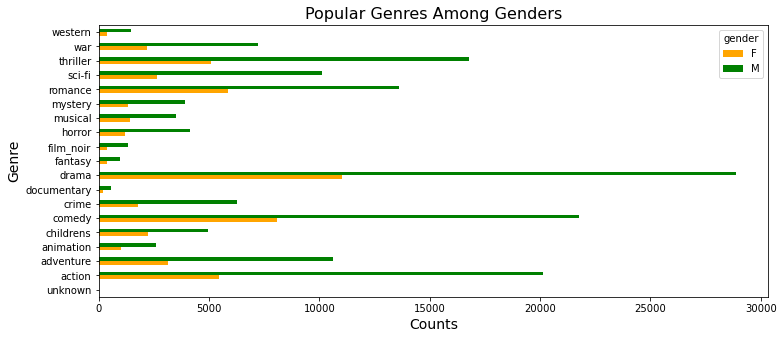

In [77]:
genres= ["unknown", "action", "adventure", "animation", "childrens", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery", "romance", "sci-fi", "thriller", "war", "western"]

full_df[genres+["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,5), color=["orange", "green"])
plt.xlabel("Counts",fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Popular Genres Among Genders", fontsize=16)
plt.show()

### Discussion:
From the plot above, we can observe drama and comedy is the most popular genre for both genders. Action movies are more popular amount males than females. Furthermore, there are more male raters than female raters in this dataset.

## Question 2: How does the rating changes through time among Males and Females?

In [75]:
# Add a column "year" to the dataframe
full_df["year"] = [str(movie_date)[-4:] for movie_date in full_df["release_date"]]
# Create the pivot table
mean_ratings=full_df.pivot_table('rating',index=["year"],columns=["gender"],aggfunc='mean')
mean_ratings

gender,F,M
year,,
1922,2.857143,3.659574
1926,NaN,3.000000
1930,3.000000,3.823529
1931,3.285714,4.135135
1932,3.666667,3.888889
...,...,...
1995,3.402478,3.353531
1996,3.418950,3.290202
1997,3.393467,3.368158


In [ ]:
print('Array of columns: \n', mean_ratings.columns)
print('Index array: \n',mean_ratings.index)

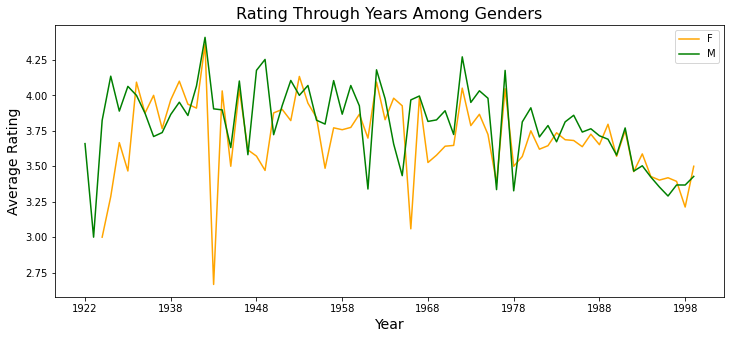

In [71]:
# Plot figure
mean_ratings['F'].plot(legend=True, figsize=(12,5), color="orange")
mean_ratings['M'].plot(legend=True, color="green")
plt.xlabel("Year",fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.title("Rating Through Years Among Genders", fontsize=16)
plt.show()

In [74]:
print('Average Rating for females:', mean_ratings['F'].mean())
print('Average Rating for males:', mean_ratings['M'].mean())

Average Rating for females: 3.6888407022089145
Average Rating for males: 3.8042079472617525


### Discussion:
We can observe from the average and the plot above, the average rating from males are slightly higher than the rating from females. The ratings from males and females generally follows the same trend. However, a sudden decrease in female ratings can be observed in 1943 and 1966. Also, from about 1980, the rating follows a decreasing trend for both male and females.